In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = np.asarray(Image.open('1234.jpg'))

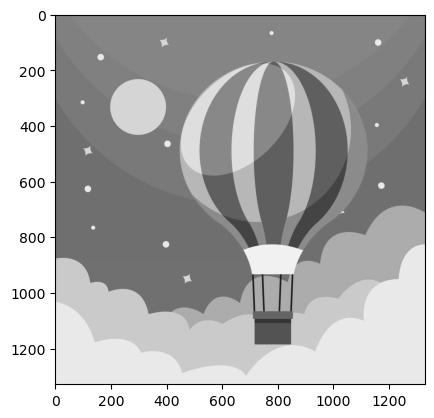

In [8]:
plt.imshow(img, cmap='gray')

In [10]:
img

array([[138, 138, 138, ..., 138, 138, 138],
       [138, 138, 138, ..., 138, 138, 138],
       [138, 138, 138, ..., 138, 138, 138],
       ...,
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232]], dtype=uint8)

In [11]:
W,H = img.shape

In [12]:
W,H

(1329, 1329)

In [13]:
message = input()
message += '[END]'
message = message.encode('ascii')
message_bits = ''.join([format(i,'08b') for i in message])

madhu


In [14]:
message

b'madhu[END]'

In [17]:
message_bits

'01101101011000010110010001101000011101010101101101000101010011100100010001011101'

In [18]:
img = img.flatten()
for idx, bit in enumerate(message_bits):
    val = img[idx]
    val = bin(val)
    val = val[:-1] + bit
    img[idx] = int(val,2)
encoded_img = img.reshape((W,H))

In [19]:
encoded_img

array([[138, 139, 139, ..., 138, 138, 138],
       [138, 138, 138, ..., 138, 138, 138],
       [138, 138, 138, ..., 138, 138, 138],
       ...,
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232]], dtype=uint8)

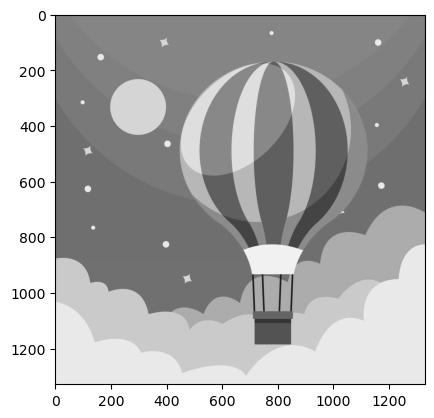

In [20]:
form_img = Image.fromarray(encoded_img)
plt.imshow(form_img, cmap='gray')
form_img.save("data/1234-modified.jpg")

In [21]:
decode_img = encoded_img.flatten()

In [22]:
decode_img

array([138, 139, 139, ..., 232, 232, 232], dtype=uint8)

In [23]:
msg = ""
idx = 0
while msg[-5:] != '[END]':
    bits = [bin(i)[-1] for i in img[idx:idx+8]]
    bits = ''.join(bits)
    msg += chr(int(bits,2))
    idx+=8
    if idx > img.shape[0]:
        print("No hidden message")
        break

In [24]:
msg

'madhu[END]'